## Introduction

In Chapter 2 we will work on the classification model of the US Census data that was analyzed in Chapter 1. My biggest interest in modelling will be dealing with the class imbalance of the target variable. In particular, I am interested in the following aspects:
<ul>
<li> How best to assess the accuracy of the classifier. It is unlikely that accuracy will suffice, because of the [accuracy paradox](https://en.wikipedia.org/wiki/Accuracy_paradox).
<li> What are some approaches that we can use to deal with the class imbalance? Examples include oversampling, undersampling, incorporating clustering algorithms, etc...
</ul>
<br>
<br>
## Results
I ran standard regression forests and logistic regressions, using the scikit-learn ***GridSearchCV*** functionality. This fits a set of classifiers for a given range of parameters and returns the best classifier, according to a provided scoring metric (eg accuracy, precision, recall, etc...). I performed cross-validation using a 70/30 trainining data / test data split. The ***GridSearchCV*** function performed 5-fold cross validation to find the best parameters. <br>
<br>
The results show that the random forests outperform the logistic regression.  <br>
<br>
After splitting the data for cross-validation, the distribution of positive and negative labels for the **test data** set is given by the following confusion matrix:
<table>
<tr>  <td> </td> <td align="center"> prediction 0 </td> <td align="center"> prediction 1 </td> </tr>
<tr> <td> class 0 </td> <td align='center'> 42,215 </td> <td align="center"> 0 </td> </tr>
<tr> <td> class 1 </td> <td align='center'>   0 </td> <td align="center"> 3,654 </td> </tr>
</table>

The random forest optimized for ***accuracy*** has the following classification results, as well as associated precision and recall values:
<table>
<tr>  <td> </td> <td> prediction 0 </td> <td> prediction 1 </td> <td>precision</td> <td>recall</td> </tr>
<tr> <td> class 0 </td> <td align="right"> 41,638 </td> <td align="right"> 577 </td> <td> 0.95231 </td> <td> 0.98633 </td> </tr>
<tr> <td> class 1 </td> <td align="right">  2,085 </td> <td align="right"> 1,569 </td> <td> 0.73113 </td> <td> 0.42939</td></tr>
</table>

The random forest optimized for ***precision*** has the following classification results, as well as associated precision and recall values:
<table>
<tr>  <td> </td> <td align="center"> prediction 0 </td> <td align="center"> prediction 1 </td> <td>precision</td> <td>recall</td> </tr>
<tr> <td> class 0 </td> <td align="center"> 42,128 </td> <td align="center"> 87 </td> <td>  0.93197 </td> <td> 0.99794 </td></tr>
<tr> <td> class 1 </td> <td align="right">  3,075 </td> <td align="center"> 579 </td> <td>  0.86937 </td> <td> 0.15846 </td></tr>
</table>

The random forest optimized for ***recall*** has the following classification results, as well as associated precision and recall values:
<table>
<tr>  <td> </td> <td align="center"> prediction 0 </td> <td align="center"> prediction 1 </td> <td>precision</td> <td>recall</td></tr>
<tr> <td> class 0 </td> <td align="center"> 38,673 </td> <td align="center"> 3,542 </td> <td>  0.97071 </td> <td> 0.91610 </td> </tr>
<tr> <td> class 1 </td> <td align="right">  1,167 </td> <td align="center"> 2,487 </td> <td>  0.41251 </td> <td> 0.68062 </td> </tr>
</table>

The results for the ***random undersampling*** and random forests have the following classification results, as well as the associated precision and recall values:

<table>
<tr>  <td> </td> <td align="center"> prediction 0 </td> <td align="center"> prediction 1 </td> <td>precision</td> <td>recall</td></tr>
<tr> <td> class 0 </td> <td align="center"> 18,013 </td> <td align="center"> 24,202 </td> <td>  0.99778 </td> <td> 0.42670 </td> </tr>
<tr> <td> class 1 </td> <td align="right">  40 </td> <td align="center"> 3,614 </td> <td>  0.12993 </td> <td> 0.98905 </td> </tr>
</table>

The results for the ***undersampling via Tomek Links*** and random forests have the following classification results, as well as the associated precision and recall values:

<table>
<tr>  <td> </td> <td align="center"> prediction 0 </td> <td align="center"> prediction 1 </td> <td>precision</td> <td>recall</td></tr>
<tr> <td> class 0 </td> <td align="center"> 38,536 </td> <td align="center"> 3,679 </td> <td>  0.97198 </td> <td> 0.91285 </td> </tr>
<tr> <td> class 1 </td> <td align="right">  1,111 </td> <td align="center"> 2,543 </td> <td>  0.40871 </td> <td> 0.69595 </td> </tr>
</table>

The results for the ***random oversampling*** and random forests have the following classification results, as well as the associated precision and recall values:

<table>
<tr>  <td> </td> <td align="center"> prediction 0 </td> <td align="center"> prediction 1 </td> <td>precision</td> <td>recall</td></tr>
<tr> <td> class 0 </td> <td align="center"> 41,606 </td> <td align="center"> 609 </td> <td>  1.00000 </td> <td> 0.98557 </td> </tr>
<tr> <td> class 1 </td> <td align="right">  0 </td> <td align="center"> 3,654 </td> <td>  0.85714 </td> <td> 1.00000 </td> </tr>
</table>

<br>


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


%matplotlib inline

## Preprocessing Data

In [2]:
# preprocessing function - developped in Chapter 1
the_columns  = [('age', 'continuous'), 
                ('class_of_worker', 'nominal'), 
                ('detailed_industry_code', 'nominal'), 
                ('detailed_occupation_code', 'nominal'), 
                ('education', 'nominal'), 
                ('wage_per_hour', 'continuous'), 
                ('enrolled_in_edu_last_week', 'nominal'),
                ('marital_status', 'nominal'),
                ('major_industry_code', 'nominal'),
                ('major_occupation_code', 'nominal'),
                ('race', 'nominal'),
                ('hispanic_origin', 'nominal'),
                ('sex', 'binary'), # binary column with values Male/Female
                ('member_of_labor_union', 'nominal'), 
                ('reason_for_unemployment', 'nominal'),
                ('full_or_part_time_employment_stat', 'nominal'),
                ('capital_gains', 'continuous'),
                ('capital_losses', 'continuous'),
                ('dividends', 'continuous'),
                ('tax_filer', 'nominal'),
                ('region_of_previous_residence', 'nominal'),
                ('state_of_previous_residence', 'nominal'),
                ('detailed_household_family_stat', 'nominal'),
                ('detailed_household_summary', 'nominal'),
                ('instance_weight', 'IGNORE'), # as per instructions, to be dropped
                ('migration_code_change_in_msa', 'nominal'),
                ('migration_code_change_in_reg', 'nominal'),
                ('migration_code_move_within_reg', 'nominal'),
                ('live_in_this_house_1_yr_ago', 'nominal'),
                ('migration_prev_res_in_sunbelt', 'nominal'),
                ('num_persons_worked_for_employer', 'continuous'),
                ('family_members_under_18', 'nominal'),
                ('cob_father', 'nominal'),
                ('cob_mother', 'nominal'),
                ('cob_self', 'nominal'),
                ('citizenship', 'nominal'),
                ('own_business_or_self_employed', 'nominal'),
                ('fill_in_questionnaire_for_veterans_admin', 'nominal'),
                ('veterans_benefits', 'nominal'),
                ('weeks_worked_in_year', 'nominal'),
                ('year', 'nominal'), 
                ('savings','target')] # binary TARGET variable


In [3]:
def preprocessData(file_name):
    # the_columns stores tuples of (column_name and tag for continuous/nominal/binary/target)
    
    raw_data = pd.read_csv(file_name, names=[c[0] for c in the_columns], index_col=False)
    original_shape = raw_data.shape
    
    raw_data.drop('instance_weight', axis=1, inplace=True)
    the_columns.remove(('instance_weight', 'IGNORE'))
    
    # find the duplicate rows, keep the first one
    duplicate_rows = raw_data.duplicated(keep='first')
    
    print 'number of duplicates = {:d}'.format(duplicate_rows.sum())
    raw_data = raw_data.drop_duplicates(keep='first')
    new_shape =  raw_data.shape
    print 'number of duplicates removed = {:d}'.format(original_shape[0] - new_shape[0])
    print 'original shape = {:d}, {:d}'.format(original_shape[0], original_shape[1])
    print 'new shape = {:d}, {:d}'.format(raw_data.shape[0], raw_data.shape[1])
    
    # convert nominal columns (object dtype) to integer type
    data = pd.DataFrame(raw_data.select_dtypes(include=['object']))
    object_columns = data.columns
    
    for column in object_columns:
        unique_values = data[column].unique()
        dictionary = {key:idx for idx,key in enumerate(unique_values)}
        data[column] = data[column].apply(lambda x : dictionary[x])
    
    # add nominal columns that were already in integer format 
    nominal_integer_columns = [c[0] for c in the_columns 
                               if c[1] == 'nominal' and c[0] not in data.columns]
    data[nominal_integer_columns] = raw_data[nominal_integer_columns]
    
    # convert 'sex', and 'savings' columns to binary; add year column
    data['savings'] = raw_data['savings'].map(lambda x: 
                                              1 if str(x).strip() == '50000+.' else 0)
    data['sex'] = raw_data['sex'].map(lambda x: 
                                      1 if str(x).strip() == 'Male' else 0)
    data['year'] = raw_data['year']
    
    # add continuous columns
    continuous_columns = [c[0] for c in the_columns if c[1] == 'continuous']
    data[continuous_columns] = raw_data[continuous_columns]
    
    # verify that we aren't missing any columns
    assert set(data.columns) == (set(raw_data.columns))
    
    text = 'The final processed data has {:,d} rows and {:d} columns.\n'
    print text.format(data.shape[0], data.shape[1])
    return data


In [4]:
data = preprocessData('us_census_full/census_income_learn.csv')

number of duplicates = 46627
number of duplicates removed = 46627
original shape = 199523, 42
new shape = 152896, 41
The final processed data has 152,896 rows and 41 columns.



In [5]:
data.head(3)

,class_of_worker,education,enrolled_in_edu_last_week,marital_status,major_industry_code,major_occupation_code,race,hispanic_origin,sex,member_of_labor_union,...,own_business_or_self_employed,veterans_benefits,weeks_worked_in_year,year,age,wage_per_hour,capital_gains,capital_losses,dividends,num_persons_worked_for_employer
0,0,0,0,0,0,0,0,0,0,0,...,0,2,0,95,73,0,0,0,0,0
1,1,1,0,1,1,1,0,0,1,0,...,0,2,52,94,58,0,0,0,0,1
2,0,2,1,2,0,0,1,0,0,0,...,0,2,0,95,18,0,0,0,0,0


## One-Hot Encoded Data
This will be required for logistic regression.

In [6]:
def one_hot_encode_nominal_columns(data):
    nominal_columns = [c[0] for c in the_columns if c[1] == 'nominal']
    
    dummy_columns = [pd.get_dummies(data[col], prefix=col, prefix_sep='.') 
                     for col in nominal_columns]
    
    one_hot_encoded_data = pd.concat(dummy_columns, axis=1)
    print '\nThere were {:d} nominal columns to be converted.'.format(len(nominal_columns))
    print 'The number of one-hot-encoded columns is {:d}.\n'.format(data.shape[1])
    
    # check size
    count_distinct_values = 0
    for column in nominal_columns:
        count_distinct_values += len(data[column].unique())
    
    assert count_distinct_values == one_hot_encoded_data.shape[1], \
        "mismatch between number of dummy columns and unique values"
    
    return one_hot_encoded_data

In [7]:
ohe_data = one_hot_encode_nominal_columns(data)

# add target (savings)
ohe_data['savings'] = data['savings']

# scale and add continuous columns
min_max_scaler = MinMaxScaler()
continuous_cols = [c[0] for c in the_columns if c[1] == 'continuous']
ohe_data[continuous_cols] = pd.DataFrame(min_max_scaler.fit_transform(
        data[continuous_cols]), columns=continuous_cols, index = data.index)

print 'The final shape is: {:,d} x {:d}.'.format(ohe_data.shape[0], ohe_data.shape[1])
mx = ohe_data.max().max()
mn = ohe_data.min().min()
print 'To verify scaling: max = {:.2f}, min={:.2f}\n'.format(mx, mn)


There were 33 nominal columns to be converted.
The number of one-hot-encoded columns is 41.

The final shape is: 152,896 x 561.
To verify scaling: max = 1.00, min=0.00



## Functions for Modelling

In [8]:
def get_train_test_data_sets(X, y):
    # obtain training and test set for cross-validation using a 70% split
    # print statistics regarding class imbalance of training and test sets

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
    print 'size of training data: {:7d}, {:3d}'.format(X_train.shape[0], X_train.shape[1])
    print 'size of test data:     {:7d}, {:3d}'.format(X_test.shape[0], X_test.shape[1])
    print
    ytr0, ytr1 = (y_train == 0).sum(), (y_train == 1).sum()
    yte0, yte1 = (y_test == 0).sum(), (y_test == 1).sum()
    print 'y_train==0: {:6d},  y_train==1: {:4d},  balance: {:.4f}'.format(
        ytr0, ytr1, float(ytr0)/(ytr0+ytr1))
    print 'y_test==0:  {:6d},  y_test==1:  {:4d},  balance: {:.4f}'.format(
        yte0, yte1, float(yte0)/(yte0+yte1))
    
    return X_train, X_test, y_train, y_test

In [9]:
def print_confusion_matrix(y_true, y_pred):
    # print confusion matrix
    header = '\t          prediction 0    prediction 1'
    row0 =   '\tclass 0 {:11,d} {:14,d}'
    row1 =   '\tclass 1 {:11,d} {:14,d}'
    cm = confusion_matrix(y_true, y_pred)
    print header
    print row0.format(cm[0,0], cm[0,1])
    print row1.format(cm[1,0], cm[1,1])
    tp, fn = float(cm[0,0]), float(cm[0,1])
    fp, tn = float(cm[1,0]), float(cm[1,1])


In [10]:
def run_grid_search(classifier, parameters, X_train, y_train, X_test, y_test,
                    score=None, print_grid_scores=False, verbose=0, n_jobs=1):
    '''
    input: 
      classifier: scikit-learn classifier, 
      parameters: parameters for grid search, 
      X_train, y_train: the cross-validation training sets,
      X_test, y_test: the corss-validation test sets, 
      score: (None) the scoring function (eg accuracy, precision, recall, ...),
      print_grid_scores: (False)boolean to print the grid scores from the grid-search
      verbose: (None) passed to the scikit-learn grid search
      n_jobs: (1) the number of jobs for parallel processing
    return: 
      the best fit scikit-learn classifier from gridsearch
    
    Run a grid search with cross-validation on the training data set for the given
    classifier, for the given range of parameters, and for the given scoring method.
    
    Print the confusion matrix and classification report for the test set.
    '''
    
    clf = GridSearchCV(classifier, parameters, scoring=score, 
                       verbose=verbose, cv=5, n_jobs=n_jobs)
    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    print 'Best parameters on training set:'
    print clf.best_params_
    print '\nBest score = {:.4f}'.format(clf.best_score_)
    if print_grid_scores:
        print '\nGrid scores on training set:\n'
        for params, mean_score, scores in clf.grid_scores_:
            print("%0.4f (+/-%0.04f) for %r"
                  % (mean_score, scores.std() * 2, params))
    print
    print 'Confusion matrix:'
    print_confusion_matrix(y_test, y_pred)
    print '\nClassification report:'
    print classification_report(y_test, y_pred, digits=5)
    return clf

In [11]:
def plot_roc_curves(models, X_test, y_test):
    plt.figure(figsize=(8,8))
    ax = plt.gca()
    fs=14
    
    for rf in models:
        probs = rf.predict_proba(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1])
        roc_auc = auc(fpr, tpr)
        ax.plot([0, 1], [0, 1], 'k--')
        label = rf.get_params()['scoring']
        text = ' (area = {:.3f})'.format(roc_auc)
        ax.plot(fpr, tpr, label=label + text)
    
    ax.set_xlabel('False positive rate', fontsize=fs)
    ax.set_ylabel('True positive rate', fontsize=fs)
    ax.set_title('ROC curve', fontsize=fs)
    ax.set_xticks(np.arange(0.0, 1.01, 0.2))
    ax.set_xticklabels(np.arange(0.0,1.01,0.2), fontsize=fs)
    ax.set_yticks(np.arange(0.0, 1.01, 0.2))
    ax.set_yticklabels(np.arange(0.0,1.01,0.2), fontsize=fs)
    ax.set_ylim((0,1.01))
    ax.set_xlim((-0.01, 1.0))
    plt.legend(fontsize=fs, bbox_to_anchor=(1.05,0.5), loc='center left')
    plt.show()

## Random Forest Model
Use the scikit-learn grid-search modules for a random forest model to find the best model. Three cases are run, optimized on different scores: accuracy, precision and recall. Confusion matrices and the classification report are printed. The ROC results are plotted.

In [12]:
X = data.drop('savings', axis=1)
y = data.loc[:,'savings']

X_train, X_test, y_train, y_test = get_train_test_data_sets(X, y)


size of training data:  107027,  40
size of test data:       45869,  40

y_train==0:  98314,  y_train==1: 8713,  balance: 0.9186
y_test==0:   42215,  y_test==1:  3654,  balance: 0.9203


In [13]:
# the actual confusion matrix for the test set is:
print_confusion_matrix(y_test, y_test)

	          prediction 0    prediction 1
	class 0      42,215              0
	class 1           0          3,654


In [14]:
rf_parameters = {'n_estimators': [200], 
                 'max_depth': [6, None],
                 'max_features' : ['sqrt', 40],
                 'min_samples_split' : [1, 2],
                 'class_weight' : [None, {1:5}]}

# rf_parameters = {'n_estimators': [100, 200],
#                  'max_depth': [4, 8, 16],
#                  'class_weight' : [None, {1: 10}]}


In [15]:
rf_a = run_grid_search(RandomForestClassifier(), rf_parameters,
                       X_train, y_train, X_test, y_test,
                       score='accuracy', verbose=1, n_jobs=2)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed: 22.7min
[Parallel(n_jobs=2)]: Done  80 out of  80 | elapsed: 45.1min finished


Best parameters on training set:
{'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200, 'max_depth': None, 'class_weight': None}

Best score = 0.9408

Confusion matrix:
	          prediction 0    prediction 1
	class 0      41,638            577
	class 1       2,085          1,569

Classification report:
             precision    recall  f1-score   support

          0    0.95231   0.98633   0.96902     42215
          1    0.73113   0.42939   0.54103      3654

avg / total    0.93469   0.94197   0.93493     45869



In [16]:
rf_p = run_grid_search(RandomForestClassifier(), rf_parameters,
                       X_train, y_train, X_test, y_test,
                       score='precision', verbose=1, n_jobs=2)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed: 23.7min
[Parallel(n_jobs=2)]: Done  80 out of  80 | elapsed: 44.6min finished


Best parameters on training set:
{'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200, 'max_depth': 6, 'class_weight': None}

Best score = 0.8906

Confusion matrix:
	          prediction 0    prediction 1
	class 0      42,128             87
	class 1       3,075            579

Classification report:
             precision    recall  f1-score   support

          0    0.93197   0.99794   0.96383     42215
          1    0.86937   0.15846   0.26806      3654

avg / total    0.92699   0.93106   0.90840     45869



In [17]:
rf_r = run_grid_search(RandomForestClassifier(), rf_parameters,
                       X_train, y_train, X_test, y_test,
                       score='recall', verbose=1, n_jobs=2)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed: 20.8min
[Parallel(n_jobs=2)]: Done  80 out of  80 | elapsed: 39.2min finished


Best parameters on training set:
{'max_features': 40, 'min_samples_split': 2, 'n_estimators': 200, 'max_depth': 6, 'class_weight': {1: 5}}

Best score = 0.6959

Confusion matrix:
	          prediction 0    prediction 1
	class 0      38,673          3,542
	class 1       1,167          2,487

Classification report:
             precision    recall  f1-score   support

          0    0.97071   0.91610   0.94261     42215
          1    0.41251   0.68062   0.51368      3654

avg / total    0.92624   0.89734   0.90844     45869



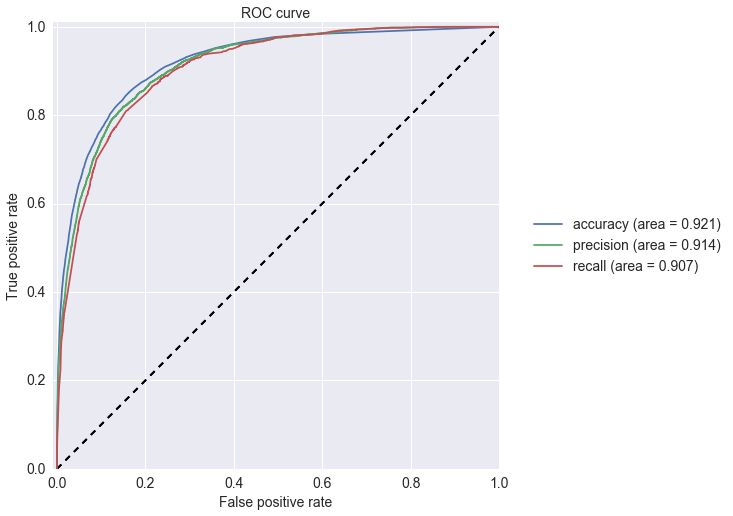

In [18]:
plot_roc_curves([rf_a, rf_p, rf_r], X_test, y_test)

## Logistic Regression
Use one-hot encoded data and run logistic regressions using L1 and L2 regularization for a range of scalings. Three models are run, scored using accuracy, precision and recall. The ROC results are plotted.

In [19]:
X_ohe = ohe_data.drop('savings', axis=1)
y_ohe = ohe_data.loc[:,'savings']

X_ohe_train, X_ohe_test, y_ohe_train, y_ohe_test = get_train_test_data_sets(X_ohe, y_ohe)


size of training data:  107027, 560
size of test data:       45869, 560

y_train==0:  98314,  y_train==1: 8713,  balance: 0.9186
y_test==0:   42215,  y_test==1:  3654,  balance: 0.9203


In [20]:
lr_parameters = {'penalty': ['l1', 'l2'], 'C': [1.0, 0.1, 0.01]}

#lr_parameters = {'penalty': ['l1'], 'C': [0.1]}

In [21]:
lr_a = run_grid_search(LogisticRegression(), lr_parameters, 
                       X_ohe_train, y_ohe_train, X_ohe_test, y_ohe_test,
                       score='accuracy', verbose=1, print_grid_scores=True)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters on training set:
{'penalty': 'l1', 'C': 1.0}

Best score = 0.9372

Grid scores on training set:

0.9372 (+/-0.0019) for {'penalty': 'l1', 'C': 1.0}
0.9367 (+/-0.0019) for {'penalty': 'l2', 'C': 1.0}
0.9366 (+/-0.0028) for {'penalty': 'l1', 'C': 0.1}
0.9352 (+/-0.0022) for {'penalty': 'l2', 'C': 0.1}
0.9300 (+/-0.0026) for {'penalty': 'l1', 'C': 0.01}
0.9323 (+/-0.0017) for {'penalty': 'l2', 'C': 0.01}

Confusion matrix:
	          prediction 0    prediction 1
	class 0      41,640            575
	class 1       2,326          1,328

Classification report:
             precision    recall  f1-score   support

          0    0.94710   0.98638   0.96634     42215
          1    0.69785   0.36344   0.47796      3654

avg / total    0.92724   0.93675   0.92743     45869



[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  5.8min finished


In [22]:
lr_p = run_grid_search(LogisticRegression(), lr_parameters, 
                       X_ohe_train, y_ohe_train, X_ohe_test, y_ohe_test,
                       score='precision', verbose=1, print_grid_scores=True)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters on training set:
{'penalty': 'l1', 'C': 0.01}

Best score = 0.7669

Grid scores on training set:

0.7136 (+/-0.0158) for {'penalty': 'l1', 'C': 1.0}
0.7106 (+/-0.0127) for {'penalty': 'l2', 'C': 1.0}
0.7274 (+/-0.0242) for {'penalty': 'l1', 'C': 0.1}
0.7124 (+/-0.0194) for {'penalty': 'l2', 'C': 0.1}
0.7669 (+/-0.0567) for {'penalty': 'l1', 'C': 0.01}
0.7352 (+/-0.0326) for {'penalty': 'l2', 'C': 0.01}

Confusion matrix:
	          prediction 0    prediction 1
	class 0      41,914            301
	class 1       2,841            813

Classification report:
             precision    recall  f1-score   support

          0    0.93652   0.99287   0.96387     42215
          1    0.72980   0.22250   0.34102      3654

avg / total    0.92005   0.93150   0.91426     45869



[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  5.9min finished


In [23]:
lr_r = run_grid_search(LogisticRegression(),  lr_parameters, 
                       X_ohe_train, y_ohe_train, X_ohe_test, y_ohe_test ,
                       score='recall', verbose=1, print_grid_scores=True)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters on training set:
{'penalty': 'l1', 'C': 1.0}

Best score = 0.3810

Grid scores on training set:

0.3810 (+/-0.0273) for {'penalty': 'l1', 'C': 1.0}
0.3744 (+/-0.0299) for {'penalty': 'l2', 'C': 1.0}
0.3533 (+/-0.0348) for {'penalty': 'l1', 'C': 0.1}
0.3424 (+/-0.0304) for {'penalty': 'l2', 'C': 0.1}
0.2020 (+/-0.0212) for {'penalty': 'l1', 'C': 0.01}
0.2635 (+/-0.0218) for {'penalty': 'l2', 'C': 0.01}

Confusion matrix:
	          prediction 0    prediction 1
	class 0      41,642            573
	class 1       2,326          1,328

Classification report:
             precision    recall  f1-score   support

          0    0.94710   0.98643   0.96636     42215
          1    0.69858   0.36344   0.47813      3654

avg / total    0.92730   0.93680   0.92747     45869



[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  5.6min finished


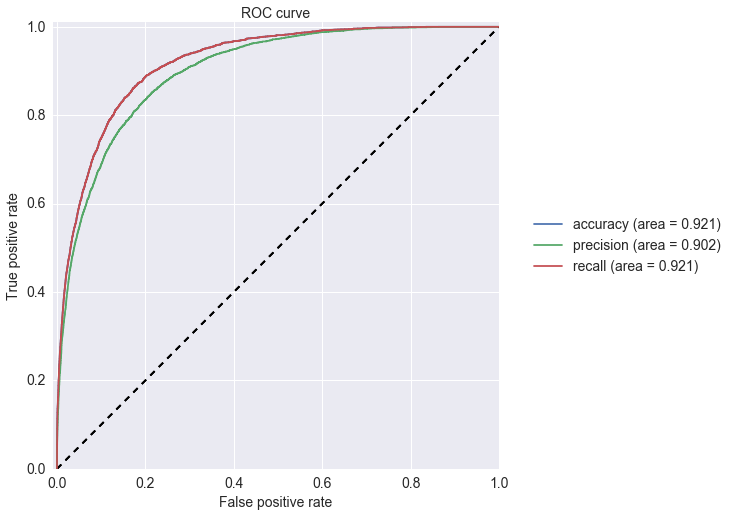

In [24]:
plot_roc_curves([lr_a, lr_p, lr_r], X_ohe_test, y_ohe_test)

## Incorporate Some Feature Engineering
Start with the column "detailed_household_family_stat" and convert the classes that have no savings greater than 50K into one class.

In [25]:
def update_column(column):
    dhfs = data[column][data['savings'] == 1].unique()
    dhfs.sort()
    print 'unique values for svngs = 1', dhfs
    dhfs_all = data[column].unique()
    dhfs_all.sort()
    print 'unique values for all vals ', dhfs_all
    
    diff = set(dhfs_all).difference(set(dhfs))
    print ' the differences are........', diff
    if diff is None:
        print '\n diff is empty'
        return data[column]
    
    print ' len(diff)', len(diff)
    
    val = max(diff) + 1
    print ' mapping values to:', val
    return data[column].map(lambda x : val if x in diff else x)


In [26]:
print data['detailed_household_family_stat'][data['savings']==0].value_counts().shape
data['detailed_household_family_stat'] = update_column('detailed_household_family_stat')
print data['detailed_household_family_stat'][data['savings']==0].value_counts().shape


(38,)
unique values for svngs = 1 [ 0  1  2  3  4  5  6  7 10 11 12 15 16 17 18 19 22 28 30]
unique values for all vals  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37]
 the differences are........ set([32, 33, 34, 35, 36, 37, 8, 9, 13, 14, 20, 21, 23, 24, 25, 26, 27, 29, 31])
 len(diff) 19
 mapping values to: 38
(20,)


In [27]:
print data['family_members_under_18'][data['savings']==0].value_counts().shape
data['family_members_under_18'] = update_column('family_members_under_18')
print data['family_members_under_18'][data['savings']==0].value_counts().shape


(5,)
unique values for svngs = 1 [0 1]
unique values for all vals  [0 1 2 3 4]
 the differences are........ set([2, 3, 4])
 len(diff) 3
 mapping values to: 5
(3,)


In [28]:
rf_clf = RandomForestClassifier(n_estimators = 40, max_depth=None, max_features=40, min_samples_split=1)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

print 'confusion matrix:'
print_confusion_matrix(y_test, y_pred)
print '\nDetailed classification report:'
print classification_report(y_test, y_pred, digits=5)

confusion matrix:
	          prediction 0    prediction 1
	class 0      41,355            860
	class 1       1,998          1,656

Detailed classification report:
             precision    recall  f1-score   support

          0    0.95391   0.97963   0.96660     42215
          1    0.65819   0.45320   0.53679      3654

avg / total    0.93036   0.93769   0.93236     45869



## Class Imbalance

In [32]:
print rf_parameters

{'n_estimators': [200], 'max_features': ['sqrt', 40], 'min_samples_split': [1, 2], 'max_depth': [6, None], 'class_weight': [None, {1: 5}]}


In [33]:
def evaluate_sampling_method(imbalance_method, X, y, X_test, y_test,
                             params, score):
    imb = imbalance_method()
    imb_x, imb_y = imb.fit_sample(X, y)
    print 'The new shape is: {:d}, {:d}'.format(imb_x.shape[0], imb_x.shape[1])
    print 
    print '** Class Imbalance ', '-'*39
    n0, n1 = (imb_y == 0).sum(), (imb_y == 1).sum()
    print 'y==0: {:6d},  y==1: {:4d},  balance: {:.4f}'.format(n0, n1, float(n0)/(n0+n1))
    print
    print '** Cross Validation ', '-'*38
    imb_x_train, imb_x_test, imb_y_train, imb_y_test = get_train_test_data_sets(imb_x, imb_y)
    print
    print '** Model Training ', '-'*40
    clf = run_grid_search(RandomForestClassifier(), params,
                          imb_x_train, imb_y_train, imb_x_test, imb_y_test,
                          score='recall', verbose=1, n_jobs=2)
    
    print '** Evaluation on Test set ', '-'*32
    y_pred = clf.predict(X_test)
    
    print 'Confusion matrix:'
    print_confusion_matrix(y_test, y_pred)
    print '\nClassification report:'
    print classification_report(y_test, y_pred, digits=5)
    return imb

### Random Under-Sampling

In [34]:
from imblearn.under_sampling import RandomUnderSampler

In [35]:
rus = evaluate_sampling_method(RandomUnderSampler, X, y, X_test, y_test, 
                         params=rf_parameters, score='recall')

The new shape is: 24734, 40

** Class Imbalance  ---------------------------------------
y==0:  12367,  y==1: 12367,  balance: 0.5000

** Cross Validation  --------------------------------------
size of training data:   17313,  40
size of test data:        7421,  40

y_train==0:   8724,  y_train==1: 8589,  balance: 0.5039
y_test==0:    3643,  y_test==1:  3778,  balance: 0.4909

** Model Training  ----------------------------------------
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  2.4min
[Parallel(n_jobs=2)]: Done  80 out of  80 | elapsed:  4.7min finished


Best parameters on training set:
{'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200, 'max_depth': 6, 'class_weight': {1: 5}}

Best score = 0.9885

Confusion matrix:
	          prediction 0    prediction 1
	class 0       1,542          2,101
	class 1          52          3,726

Classification report:
             precision    recall  f1-score   support

          0    0.96738   0.42328   0.58889      3643
          1    0.63944   0.98624   0.77585      3778

avg / total    0.80042   0.70988   0.68407      7421

** Evaluation on Test set  --------------------------------
Confusion matrix:
	          prediction 0    prediction 1
	class 0      18,013         24,202
	class 1          40          3,614

Classification report:
             precision    recall  f1-score   support

          0    0.99778   0.42670   0.59776     42215
          1    0.12993   0.98905   0.22968      3654

avg / total    0.92865   0.47149   0.56844     45869



### Under Sampling Using Tomek Links

In [37]:
from imblearn.under_sampling import TomekLinks

In [38]:
tlinks = evaluate_sampling_method(TomekLinks, X, y, X_test, y_test, 
                         params=rf_parameters, score='recall')

The new shape is: 149929, 40

** Class Imbalance  ---------------------------------------
y==0: 137562,  y==1: 12367,  balance: 0.9175

** Cross Validation  --------------------------------------
size of training data:  104950,  40
size of test data:       44979,  40

y_train==0:  96263,  y_train==1: 8687,  balance: 0.9172
y_test==0:   41299,  y_test==1:  3680,  balance: 0.9182

** Model Training  ----------------------------------------
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed: 24.0min
[Parallel(n_jobs=2)]: Done  80 out of  80 | elapsed: 45.1min finished


Best parameters on training set:
{'max_features': 40, 'min_samples_split': 2, 'n_estimators': 200, 'max_depth': 6, 'class_weight': {1: 5}}

Best score = 0.6946

Confusion matrix:
	          prediction 0    prediction 1
	class 0      38,042          3,257
	class 1       1,129          2,551

Classification report:
             precision    recall  f1-score   support

          0    0.97118   0.92114   0.94550     41299
          1    0.43922   0.69321   0.53773      3680

avg / total    0.92766   0.90249   0.91213     44979

** Evaluation on Test set  --------------------------------
Confusion matrix:
	          prediction 0    prediction 1
	class 0      38,536          3,679
	class 1       1,111          2,543

Classification report:
             precision    recall  f1-score   support

          0    0.97198   0.91285   0.94149     42215
          1    0.40871   0.69595   0.51499      3654

avg / total    0.92711   0.89557   0.90751     45869



### Random Over Sampling

In [39]:
from imblearn.over_sampling import RandomOverSampler

In [40]:
ros = evaluate_sampling_method(RandomOverSampler, X, y, X_test, y_test, 
                         params=rf_parameters, score='recall')

The new shape is: 281058, 40

** Class Imbalance  ---------------------------------------
y==0: 140529,  y==1: 140529,  balance: 0.5000

** Cross Validation  --------------------------------------
size of training data:  196740,  40
size of test data:       84318,  40

y_train==0:  98180,  y_train==1: 98560,  balance: 0.4990
y_test==0:   42349,  y_test==1:  41969,  balance: 0.5023

** Model Training  ----------------------------------------
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed: 55.7min
[Parallel(n_jobs=2)]: Done  80 out of  80 | elapsed: 112.9min finished


Best parameters on training set:
{'max_features': 40, 'min_samples_split': 2, 'n_estimators': 200, 'max_depth': None, 'class_weight': None}

Best score = 0.9994

Confusion matrix:
	          prediction 0    prediction 1
	class 0      40,405          1,944
	class 1           0         41,969

Classification report:
             precision    recall  f1-score   support

          0    1.00000   0.95410   0.97651     42349
          1    0.95573   1.00000   0.97736     41969

avg / total    0.97797   0.97694   0.97693     84318

** Evaluation on Test set  --------------------------------
Confusion matrix:
	          prediction 0    prediction 1
	class 0      41,606            609
	class 1           0          3,654

Classification report:
             precision    recall  f1-score   support

          0    1.00000   0.98557   0.99273     42215
          1    0.85714   1.00000   0.92308      3654

avg / total    0.98862   0.98672   0.98719     45869

